# Rough Work
1. Use StandardScaler if using Logistic Regression, don't if using RandomForest

# Remember (For me)
Benign means:

A growth or abnormality that is not cancer and does not spread to other parts of the body.

# 1. Main Aim
To train a machine learning model capable of predicting whether breast tissue is cancerous or non-cancerous using Electrical Impedance Spectroscopy data.

The model will classify breast tissue into the following categories, which will serve as the benchmark labels:

Tissue Types:

car — Carcinoma (Cancerous tissue)

fad — Fibro-adenoma (Benign tumor)

mas — Mastopathy (Benign abnormality)

*gla — Glandular tissue) (Normal)

*con — Connective tissue) (Normal)

*adi — Adipose tissue) (Normal)

# 2. Gathering the data
We already have a good quality dataset available to us, thanks to kaggle and the author - Tarık Tuna Taşaltı

kaggle link :- https://www.kaggle.com/datasets/tarktunataalt/breast-tissue-impedance-measurements

A note from the author of the dataset -

S, JP and Jossinet, J. (2010). Breast Tissue. UCI Machine Learning Repository. https://doi.org/10.24432/C5P31H.

# 3. Exploratory Data analysis on the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv")
df

,Class,I0,PA500,HFS,DA,Area,A.DA,Max.IP,DR,P
0,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,car,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
3,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503
...,...,...,...,...,...,...,...,...,...,...
101,adi,2000.000000,0.106989,0.105418,520.222649,40087.920984,77.059161,204.090347,478.517223,2088.648870
102,adi,2600.000000,0.200538,0.208043,1063.441427,174480.476218,164.071543,418.687286,977.552367,2664.583623
103,adi,1600.000000,0.071908,-0.066323,436.943603,12655.342135,28.963331,103.732704,432.129749,1475.371534
104,adi,2300.000000,0.045029,0.136834,185.446044,5086.292497,27.427344,178.691742,49.593290,2480.592151


In [3]:
df.describe()

,I0,PA500,HFS,DA,Area,A.DA,Max.IP,DR,P
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,784.251618,0.120133,0.114691,190.568642,7335.155162,23.473784,75.381258,166.710575,810.638127
std,753.950075,0.068596,0.101347,190.801448,18580.314213,23.354672,81.345838,181.309580,763.019135
min,103.000000,0.012392,-0.066323,19.647670,70.426239,1.595742,7.968783,-9.257696,124.978561
25%,250.000000,0.067413,0.043982,53.845470,409.647141,8.180321,26.893773,41.781258,270.215238
50%,384.936489,0.105418,0.086568,120.777303,2219.581163,16.133657,44.216040,97.832557,454.108153
75%,1487.989626,0.169602,0.166504,255.334809,7615.204968,30.953294,83.671755,232.990070,1301.559438
max,2800.000000,0.358316,0.467748,1063.441427,174480.476218,164.071543,436.099640,977.552367,2896.582483


In [4]:
df.head()

,Class,I0,PA500,HFS,DA,Area,A.DA,Max.IP,DR,P
0,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,car,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
3,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503


Note - We don't have any categorical values which means no need for categorical handling

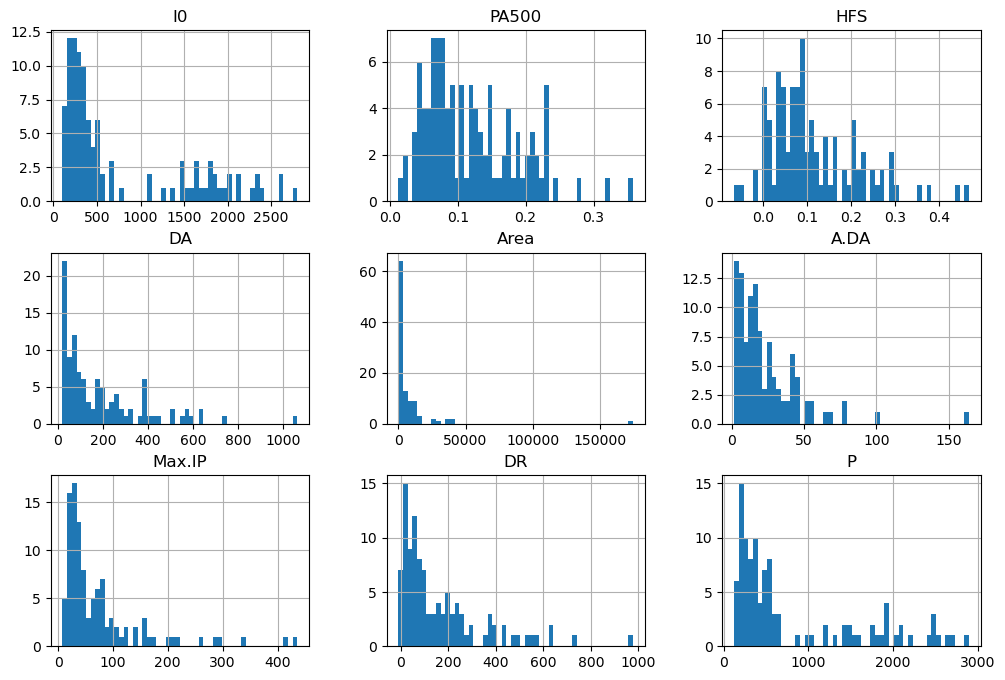

In [5]:
df.hist(bins=50, figsize=(12,8))
plt.savefig("Hist.jpg")

In [6]:
df.isnull().sum() # No null values

Class     0
I0        0
PA500     0
HFS       0
DA        0
Area      0
A.DA      0
Max.IP    0
DR        0
P         0
dtype: int64

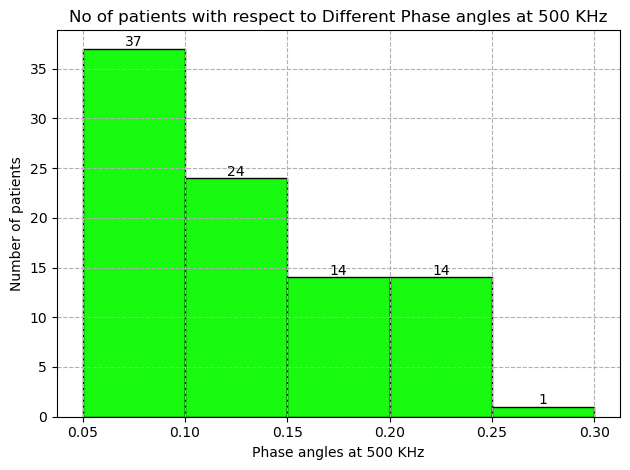

In [7]:
data = df["PA500"].copy().tolist()
bins = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30]
counts, bin_edges, patches = plt.hist(data, bins=bins, edgecolor="black", color="#18FA0F")
plt.title("No of patients with respect to Different Phase angles at 500 KHz")
plt.xlabel("Phase angles at 500 KHz")
plt.ylabel("Number of patients")
plt.grid(True, linestyle="--")

for count, patch in zip(counts, patches):
    plt.text(
        patch.get_x() + patch.get_width() / 2,
        count + 0.65,
        int(count),
        ha="center",
        va="center")

plt.tight_layout()
plt.savefig("Hist2.jpg")
plt.show()

# 4. Data preprocessing

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [9]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["Class"]):
    train_set = df.iloc[train_index]
    test_set = df.iloc[test_index]

test_set.to_csv("Testing_data.csv", index=False)

In [10]:
features = train_set.drop("Class", axis=1)
labels = train_set["Class"].copy()

num_attrs = features.columns

In [11]:
num_pipeline = Pipeline([
    ("scaler", StandardScaler())
])
full_pipeline = ColumnTransformer([
    ("nums", num_pipeline, num_attrs)
])

In [12]:
prepared_data = full_pipeline.fit_transform(features)

# 5. Selecting the right model and training it

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [14]:
test_df = pd.read_csv("Testing_data.csv")
test_features = test_df.drop("Class", axis=1)
test_labels = test_df["Class"].copy()

prepared_test = full_pipeline.transform(test_features)

In [15]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(prepared_data, labels)
log_reg_predicts = log_reg.predict(prepared_test)

forest = RandomForestClassifier()
forest.fit(prepared_data, labels)
forest_predicts = forest.predict(prepared_test)

In [16]:
print("Accuracy of Logistic Regression:", accuracy_score(test_labels, log_reg_predicts))
print(classification_report(test_labels, log_reg_predicts))

print("Accuracy score of Random Forest Classifier:", accuracy_score(test_labels, forest_predicts))
print(classification_report(test_labels, forest_predicts))

Accuracy of Logistic Regression: 0.6818181818181818
              precision    recall  f1-score   support

         adi       0.80      0.80      0.80         5
         car       0.80      1.00      0.89         4
         con       0.67      0.67      0.67         3
         fad       0.40      0.67      0.50         3
         gla       1.00      1.00      1.00         3
         mas       0.00      0.00      0.00         4

    accuracy                           0.68        22
   macro avg       0.61      0.69      0.64        22
weighted avg       0.61      0.68      0.64        22

Accuracy score of Random Forest Classifier: 0.7272727272727273
              precision    recall  f1-score   support

         adi       1.00      0.80      0.89         5
         car       0.80      1.00      0.89         4
         con       0.75      1.00      0.86         3
         fad       0.50      0.67      0.57         3
         gla       0.75      1.00      0.86         3
         mas     

Our dataset was very small to begin with hence our accuracies are not that great because even one wrong answer drops accuracy by a lot

In [17]:
log_reg_scores = cross_val_score(log_reg, prepared_data, labels, cv=3, scoring="accuracy")
forest_scores = cross_val_score(forest, prepared_data, labels, cv=3, scoring="accuracy")
print("The accuracy of Logistic Regression is:", log_reg_scores.mean())
print("The accuracy of Random Forest Classifier is:", forest_scores.mean())

The accuracy of Logistic Regression is: 0.6904761904761906
The accuracy of Random Forest Classifier is: 0.7261904761904762


Hence we will choose Random Forest Classifier as our model

# 6. Showing Result

In [18]:
results = pd.read_csv("Predictions.csv")
results

,Class,I0,PA500,HFS,DA,Area,A.DA,Max.IP,DR,P,Predicted_Class
0,mas,310.000000,0.174707,0.165457,98.509961,2741.032044,27.824923,49.327862,85.270010,388.977808,car
1,car,325.000000,0.224624,0.286932,229.215863,5705.332090,24.890651,35.602715,227.264794,462.703007,car
2,adi,1600.000000,0.071908,-0.066323,436.943603,12655.342135,28.963331,103.732704,432.129749,1475.371534,con
3,con,650.000000,0.041015,0.145211,216.811330,427.534068,1.971918,33.765163,214.165980,528.699233,con
4,gla,185.000000,0.149749,0.085172,39.891409,361.747980,9.068318,26.860762,29.492780,210.178719,gla
5,mas,339.508548,0.045379,0.030020,88.629809,331.080390,3.735542,19.825581,87.621180,307.793194,fad
6,fad,301.304399,0.109781,0.035605,64.616200,942.773191,14.590353,29.045677,57.720030,335.768459,fad
7,con,1385.664721,0.092328,0.089361,202.480044,8785.028733,43.387134,143.092194,143.257780,1524.609204,adi
8,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334,car
9,gla,124.128728,0.131947,0.108909,20.592633,78.342794,3.804409,18.462399,9.121206,134.892697,gla


In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
results["Class"].value_counts()

Class
adi    5
mas    4
car    4
con    3
gla    3
fad    3
Name: count, dtype: int64

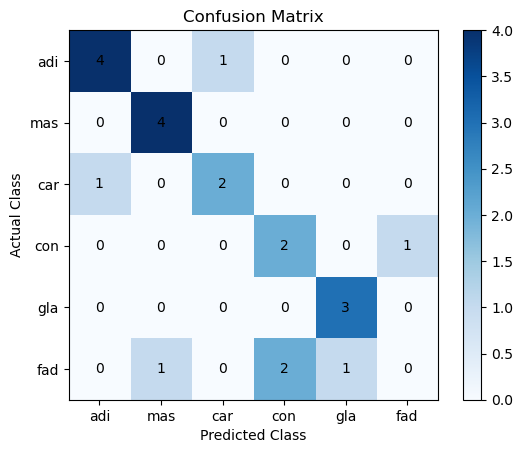

In [21]:
actual = results["Class"].reset_index(drop=True)
pred = results["Predicted_Class"].reset_index(drop=True)

cm = confusion_matrix(actual, pred)
plt.figure()
plt.imshow(cm, cmap="Blues")
plt.colorbar()
plt.xticks([0, 1, 2, 3, 4, 5], ["adi", "mas", "car", "con", "gla", "fad"])
plt.yticks([0, 1, 2, 3, 4, 5], ["adi", "mas", "car", "con", "gla", "fad"])

for i in range(6):
    for j in range(6):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.savefig("matrix.jpg")
plt.show()